In [1]:
import math
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1. Evaluating the k-NN Algorithm

In [17]:
df = pd.read_csv("iris.csv", header=None)
np.random.seed(0)
#store results of iterations in dict
test_res = defaultdict(list)
train_res = defaultdict(list)
test_no_norm = defaultdict(list)

for iteration in range(20):
    #shuffle data
    ds = df.sample(frac=1)

    #split data into 80% train, 20% test
    train, test = train_test_split(ds,test_size=0.2)
    train_att = train[[0,1,2,3]]
    test_att = test[[0,1,2,3]]

    #normalize data
    train_norm = (train_att - train_att.min()) / (train_att.max() - train_att.min())
    test_norm = (test_att - train_att.min()) / (train_att.max() - train_att.min())
    train_norm.fillna(0, inplace=True)
    test_norm.fillna(0, inplace=True)

    '''
    k - number of neighbors
    data - dataset
    instance - instance to classify
    '''
    def knn(k,data,instance):
        distances = data.apply(lambda row: math.dist(row,instance), axis=1)
        #get k closest instances (including the input instance)
        k_neighbors = distances.sort_values()[:k]
        #get class value with largest number of occurences
        predicted_class = df.loc[k_neighbors.index,[4]][4].mode()
        return predicted_class[0]

    '''
    train knn using training data
    return the accuracy of the model
    examples - specify training set
    '''
    def train_knn(k,data,examples):
        predictions = data.apply(lambda row: knn(k,examples,row), axis=1)
        actual_labels = df.loc[predictions.index,[4]]
        return predictions.eq(actual_labels[4].values).mean()

    for i in range(1,51,2):
        train_res[i].append(train_knn(i,train_norm,train_norm))
        test_res[i].append(train_knn(i,test_norm,train_norm))
        test_no_norm[i].append(train_knn(i,test_att,train_att))

**Q1.1 (10 Points)** In the first graph, you should show the value of k on the horizontal axis,
and on the vertical axis, the average accuracy of models trained over the training set, given
that particular value of k. Also show, for each point in the graph, the corresponding standard
deviation; you should do this by adding error bars to each point. The graph should look like the
one in Figure 2 (though the “shape” of the curve you obtain may be different, of course).

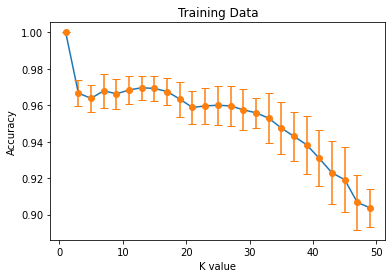

In [21]:
train_iter = []
train_acc = []
train_std = []

for k_val,res in train_res.items():
    train_iter.append(k_val)
    train_acc.append(np.average(res))
    train_std.append(np.std(res))

plt.plot(train_iter,train_acc)
plt.errorbar(train_iter,train_acc,yerr = train_std,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Training Data")
plt.show()

**Q1.2 (10 Points)** In the second graph, you should show the value of k on the horizontal axis,
and on the vertical axis, the average accuracy of models trained over the testing set, given
that particular value of k. Also show, for each point in the graph, the corresponding standard
deviation by adding error bars to the point.

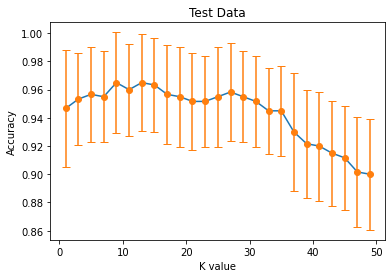

In [22]:
test_iter = []
test_acc = []
test_std = []

for k_val,res in test_res.items():
    test_iter.append(k_val)
    test_acc.append(np.average(res))
    test_std.append(np.std(res))


plt.plot(test_iter,test_acc)
plt.errorbar(test_iter,test_acc,yerr = test_std,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Test Data")
plt.show()

**Q1.3 (8 Points)** Explain intuitively why each of these curves look the way they do. First,
analyze the graph showing performance on the training set as a function of k. Why do you think
the graph looks like that? Next, analyze the graph showing performance on the testing set as a
function of k. Why do you think the graph looks like that?

>For the graph showing performance on the training set, for K = 1 the accuracy is 1.00 due to the fact that we do not ignore the instance being tested in our KNN algorithm. This means that the algorithm will always group instances from the training sets with themselves. The std deviation for each point generally increases for increased values of K. This makes sense because as larger groups are formed, it is likelier that data points are incorrectly labeled.
For the graph showing performance on the testing set, the accuracy maxes out at around 0.96 for K = 9. There is a general decrease in accuracy as K increases but for low values of K there is slight growth. The std deviation for each point is roughly the same and is significantly larger than in the training set. This is likely due to the fact that both the training and testing sets are normalized according to the training set, and that the testing set is significantly smaller than the training set.

**Q1.4 (6 Points)** We say that a model is underfitting when it performs poorly on the training
data (and most likely on the testing data as well). We say that a model is overfitting when it
performs well on training data but it does not generalize to new instances. Identify and report
the ranges of values of k for which k-NN is underfitting, and ranges of values of k for which
k-NN is overfitting.

>For K values from 1-15 the model is overfitting. For K values from 15-51, the model is still overfitting, but it becomes increasingly underfitting.

**Q1.5 (6 Points)** Based on the analyses made in the previous question, which value of k you
would select if you were trying to fine-tune this algorithm so that it worked as well as possible in
real life? Justify your answer.

>I would select a K value of about 15, as this is when the model starts to switch from overfitting to underfitting. In both the training and testing data, the accuracy is around 0.96 at K = 15, meaning the estimates for both sets are similarly accurate (although the testing data shows a significantly greater std deviation).

**Q1.6 (10 Points)** In the experiments conducted earlier, you normalized the features before
running k-NN. This is the appropriate procedure to ensure that all features are considered
equally important when computing distances. Now, you will study the impact of omitting feature
normalization on the performance of the algorithm. To accomplish this, you will repeat Q1.2
and create a graph depicting the average accuracy (and corresponding standard deviation) of
k-NN as a function of k, when evaluated on the testing set. However, this time you will run the
algorithm without first normalizing the features. This means that you will run k-NN directly on
the instances present in the original dataset without performing any pre-processing normalization
steps to ensure that all features lie in the same range/interval. 
Now (a) present the graph you created;

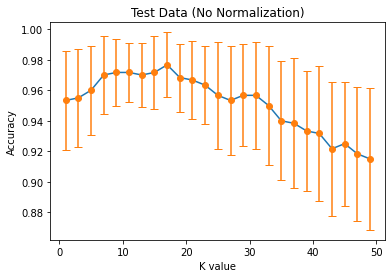

In [23]:
test_iter_raw = []
test_acc_raw = []
test_std_raw = []

for k_val,res in test_no_norm.items():
    test_iter_raw.append(k_val)
    test_acc_raw.append(np.average(res))
    test_std_raw.append(np.std(res))

plt.plot(test_iter_raw,test_acc_raw)
plt.errorbar(test_iter_raw,test_acc_raw,yerr = test_std_raw,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Test Data (No Normalization)")
plt.show()

(b) based on this graph, identify the best value of k; that is, the value of k that results
in k-NN performing the best on the testing set; 

>Based on this graph, I would choose a value of K closer to 20, either 17 or 19. This is because the accuracy is higher around these points and the std deviation is lower when compared to the normalized graphs.

and (c) describe how the performance of this
version of k-NN (without feature normalization) compares with the performance of k-NN with
feature normalization. Discuss intuitively the reasons why one may have performed better than
the other.

>This version of KNN seems to perform better than the version with normalization. The accuracy of the non-normalized KNN is slightly higher and the std deviation is lower in the K = 15-20 range. The reasons for this improved accuracy and deviation may be due to the fact that normalizing the test data on the training data could cause the model to overfit to the training data.

## 2. Evaluating the Decision Tree Algorithm

In [72]:
class DecisionNode():
    '''
    Constructor for decision node
    attr - attribute to be tested on
    child_0 - child node for 0 value on attr
    child_1 - child node for 1 value on attr
    child_2 - child node for 2 value on attr
    label - class label. default None, if not none, indicates that this is a leaf
    '''
    def __init__(self, attr, child_0, child_1, child_2, label=None):
        self.attr = attr
        self.child_0 = child_0
        self.child_1 = child_1
        self.child_2 = child_2
        self.label = label

'''
Function to create decision tree based on data
do_ig - boolean, True to use info gain, False to use gini critereon
set_depth - float (default 1) to set as the proportions of instances to create a leaf node
'''
def learn_tree(data,attr_list,do_ig,set_depth=1.0):
    #if proportion of entries in the same target class > set_depth, return leaf node of that class
    if (data['target'].value_counts().iloc[0]/len(data)) >= set_depth:
        return DecisionNode(None,None,None,None,data['target'].unique()[0])
    #if no more attr to be tested, return leaf w majority class
    if len(attr_list) == 0:
        return DecisionNode(None,None,None,None,data['target'].mode()[0])

    #find best attr from list using info gain
    max_gain = float('-inf')
    min_gini = float('inf')
    best_attr = ''

    for attr in attr_list:
        if do_ig:
            ig_attr = get_info_gain(data,attr)
            if ig_attr > max_gain:
                max_gain = ig_attr
                best_attr = attr
        else:
            gini_attr = get_critereon(data,attr)
            if gini_attr < min_gini:
                min_gini = gini_attr
                best_attr = attr

    #remove attr from list
    attr_list.remove(best_attr)
    
    #create children, if no data with that value, create leaf node with majority class of current data set
    child_0 = learn_tree(data.loc[data[best_attr] == 0],attr_list,do_ig) if len(data.loc[data[best_attr] == 0]) > 0 else DecisionNode(None,None,None,None,data['target'].mode()[0])
    child_1 = learn_tree(data.loc[data[best_attr] == 1],attr_list,do_ig) if len(data.loc[data[best_attr] == 1]) > 0 else DecisionNode(None,None,None,None,data['target'].mode()[0])
    child_2 = learn_tree(data.loc[data[best_attr] == 2],attr_list,do_ig) if len(data.loc[data[best_attr] == 2]) > 0 else DecisionNode(None,None,None,None,data['target'].mode()[0])
    
    return DecisionNode(best_attr,child_0,child_1,child_2)


#Helper functions for decision tree
def get_info_gain(data,attr):
    data_0 = data.loc[data[attr] == 0]
    data_1 = data.loc[data[attr] == 1]
    data_2 = data.loc[data[attr] == 2]
    split_entropy = (entropy(data_0)*len(data_0) + entropy(data_1)*len(data_1) + entropy(data_2)*len(data_2))/len(data)

    return entropy(data) - split_entropy

def entropy(data):
    if len(data) == 0:
        return 0
    prob_0 = data['target'].value_counts().iloc[0]/len(data)
    ent = -(prob_0 * math.log(prob_0,2))
    if len(data['target'].value_counts()) > 1:
        prob_1 = data['target'].value_counts().iloc[1]/len(data)
        ent -= (prob_1 * math.log(prob_1,2))
    else:
        pass
    return ent

def get_critereon(data,attr):
    data_0 = data.loc[data[attr] == 0]
    data_1 = data.loc[data[attr] == 1]
    data_2 = data.loc[data[attr] == 2]
    return (gini(data_0)*len(data_0) + gini(data_1)*len(data_1) + gini(data_2)*len(data_2))/len(data)

def gini(data):
    if len(data) == 0:
        return 0
    prob_0 = data['target'].value_counts().iloc[0]/len(data)
    crit = prob_0 ** 2
    if len(data['target'].value_counts()) > 1:
        prob_1 = data['target'].value_counts().iloc[1]/len(data)
        crit += prob_1 ** 2
    else:
        pass
    return crit

#train tree on training data
voter_df = pd.read_csv('house_votes_84.csv')



In [3]:
#function to classify an instance based on decision tree
def classify(instance):
    node = decision_tree
    while node.label is None:
        if instance[node.attr] == 0:
            node = node.child_0
        elif instance[node.attr] == 1:
            node = node.child_1
        else:
            node = node.child_2
    guess = node.label
    actual = instance['target']
    return guess

#test accuracy on training data
def test_decision(to_train):
    predictions = to_train.apply(lambda row: classify(row), axis=1)
    actual_labels = voter_df.loc[predictions.index,['target']]
    return predictions.eq(actual_labels['target'].values).mean()

accuracy_test = []
accuracy_train = []

for i in range (100):
    voter_train, voter_test = train_test_split(voter_df,test_size=0.2)
    attributes = list(voter_train.columns.values)
    attributes.remove('target')
    decision_tree = learn_tree(voter_train,attributes,True)
    accuracy_train.append(test_decision(voter_train))
    accuracy_test.append(test_decision(voter_test))


**Q2.1 (12 Points)** In the first histogram, you should show the accuracy distribution when the
algorithm is evaluated over training data. The horizontal axis should show different accuracy
values, and the vertical axis should show the frequency with which that accuracy was observed
while conducting these 100 experiments/training processes. The histogram should look like the
one in Figure 3 (though the “shape” of the histogram you obtain may be different, of course).
You should also report the mean accuracy and its standard deviation.

>Mean: 0.97, Standard Deviation: 0.01

<function matplotlib.pyplot.show(close=None, block=None)>

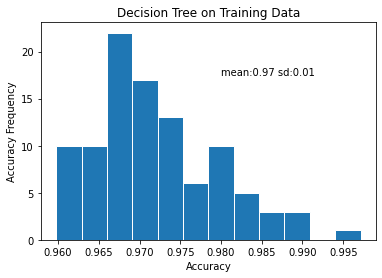

In [83]:
num_bins = len(set(accuracy_train))
plt.hist(accuracy_train,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Training Data")
plt.text(0.98,17.5,f'mean:{np.mean(accuracy_train):.2f} sd:{np.std(accuracy_train):.2f}')
plt.show

**Q2.2 (12 Points)** In the second histogram, you should show the accuracy distribution when
the algorithm is evaluated over testing data. The horizontal axis should show different accuracy
values, and the vertical axis should show the frequency with which that accuracy was observed
while conducting these 100 experiments/training processes. You should also report the mean
accuracy and its standard deviation.

>Mean: 0.94, Standard Deviation: 0.02

<function matplotlib.pyplot.show(close=None, block=None)>

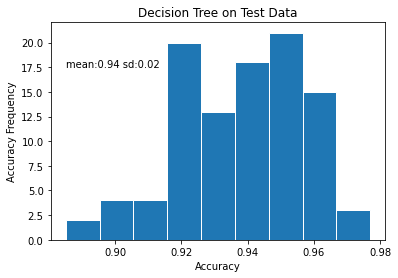

In [60]:
num_bins = len(set(accuracy_test))
plt.hist(accuracy_test,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Test Data")
plt.text(0.885,17.5,f'mean:{np.mean(accuracy_test):.2f} sd:{np.std(accuracy_test):.2f}')
plt.show

**Q2.3 (12 Points)** Explain intuitively why each of these histograms looks the way they do. Is
there more variance in one of the histograms? If so, why do you think that is the case? Does one
histogram show higher average accuracy than the other? If so, why do you think that is the case?

>The test data histogram has a higher standard deviation and a lower accuracy than the training data histogram. This makes sense, as the training data was used to create the decision tree.

**Q2.4 (8 Points)** By comparing the two histograms, would you say that the Decision Trees
algorithm, when used in this dataset, is underfitting, overfitting, or performing reasonably well?
Explain your reasoning.

>The algorithm is slightly overfitting, but it could be argued that it is performing reasonably well. The model scores an average 0.97 accuracy on the training data and 0.94 on the test data. This accuracy is high but adjustments to the conditions for determining leaf nodes could improve this accuracy.

**Q2.5 (6 Points)** In class, we discussed how Decision Trees might be non-robust. Is it possible to
experimentally confirm this property/tendency via these experiments, by analyzing the histograms
you generated and their corresponding average accuracies and standard deviations? Explain your
reasoning.

>It is experimentally possible to confirm the issue of decision trees being non-robust. The histogram displaying the performance on the test data shows this somewhat due to its standard deviation of 0.02 (double that of the testing data). If the number of iterations were increased, it is likely that this issue would be more visible.

**[QE.1] Extra points (15 Points)** Repeat the experiments Q2.1 to Q2.4, but now use
the Gini criterion for node splitting, instead of the Information Gain criterion.

In [64]:
accuracy_test_gini = []
accuracy_train_gini = []

for i in range (100):
    voter_train, voter_test = train_test_split(voter_df,test_size=0.2)
    attributes = list(voter_train.columns.values)
    attributes.remove('target')
    decision_tree = learn_tree(voter_train,attributes,False)
    accuracy_train_gini.append(test_decision(voter_train))
    accuracy_test_gini.append(test_decision(voter_test))

<function matplotlib.pyplot.show(close=None, block=None)>

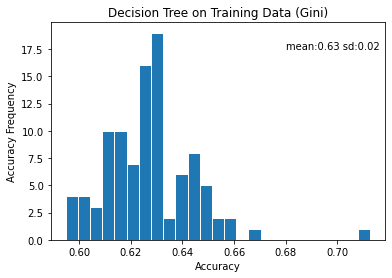

In [67]:
num_bins = len(set(accuracy_train_gini))
plt.hist(accuracy_train_gini,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Training Data (Gini)")
plt.text(0.68,17.5,f'mean:{np.mean(accuracy_train_gini):.2f} sd:{np.std(accuracy_train_gini):.2f}')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

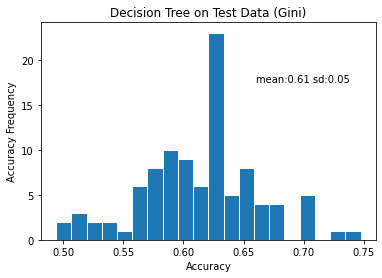

In [70]:
num_bins = len(set(accuracy_test_gini))
plt.hist(accuracy_test_gini,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Test Data (Gini)")
plt.text(0.66,17.5,f'mean:{np.mean(accuracy_test_gini):.2f} sd:{np.std(accuracy_test_gini):.2f}')
plt.show

Explain intuitively why each of these histograms looks the way they do. Is
there more variance in one of the histograms? If so, why do you think that is the case? Does one
histogram show higher average accuracy than the other? If so, why do you think that is the case?

>The histogram for the training data has a higher average accuracy and lower standard deviation than the test data. Similarly to the graphs when using information gain, this is due to the fact that the training data is used to train the decision tree, so training data is likely to perform better than the testing data. In general the Gini critereon performs significantly worse than information gain.

By comparing the two histograms, would you say that the Decision Trees
algorithm, when used in this dataset, is underfitting, overfitting, or performing reasonably well?
Explain your reasoning.

>The algorithm seems to be underfitting, as the accuracy of both the training and testing data is very low and has a high standard deviation.

**[QE.2] Extra points (15 Points)** Repeat the experiments Q2.1 to Q2.4 but now use a
simple heuristic to keep the tree from becoming too “deep”; i.e., to keep it from
testing a (possibly) excessive number of attributes, which is known to often cause
overfitting. To do this, use an additional stopping criterion: whenever more than
85% of the instances associated with a decision node belong to the same class, do not
further split this node. Instead, replace it with a leaf node whose class prediction is
the majority class within the corresponding instances. E.g., if 85% of the instances
associated with a given decision node have the label/class Democrat, do not further
split this node, and instead directly return the prediction Democrat.


In [75]:
accuracy_test_depth = []
accuracy_train_depth = []

for i in range (100):
    voter_train, voter_test = train_test_split(voter_df,test_size=0.2)
    attributes = list(voter_train.columns.values)
    attributes.remove('target')
    decision_tree = learn_tree(voter_train,attributes,True,0.85)
    accuracy_train_depth.append(test_decision(voter_train))
    accuracy_test_depth.append(test_decision(voter_test))

<function matplotlib.pyplot.show(close=None, block=None)>

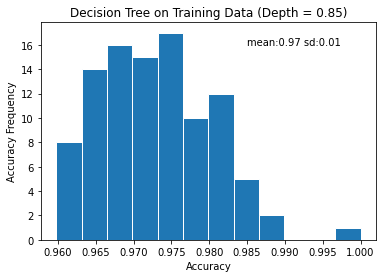

In [79]:
num_bins = len(set(accuracy_train_depth))
plt.hist(accuracy_train_depth,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Training Data (Depth = 0.85)")
plt.text(0.985,16,f'mean:{np.mean(accuracy_train_depth):.2f} sd:{np.std(accuracy_train_depth):.2f}')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

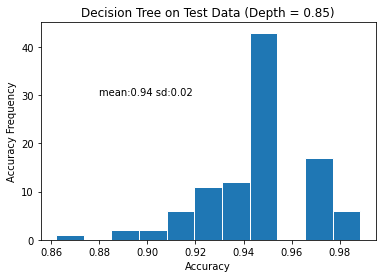

In [82]:
num_bins = len(set(accuracy_test_depth))
plt.hist(accuracy_test_depth,bins=num_bins,edgecolor='white',linewidth=1)
plt.ylabel("Accuracy Frequency")
plt.xlabel("Accuracy")
plt.title("Decision Tree on Test Data (Depth = 0.85)")
plt.text(0.88,30,f'mean:{np.mean(accuracy_test_depth):.2f} sd:{np.std(accuracy_test_depth):.2f}')
plt.show

Explain intuitively why each of these histograms looks the way they do. Is
there more variance in one of the histograms? If so, why do you think that is the case? Does one
histogram show higher average accuracy than the other? If so, why do you think that is the case?

>The histogram for the training data has a higher average accuracy and lower standard deviation than the test data. Similarly to the previous graphs, this is due to the fact that the training data is used to train the decision tree, so training data is likely to perform better than the testing data.

By comparing the two histograms, would you say that the Decision Trees
algorithm, when used in this dataset, is underfitting, overfitting, or performing reasonably well?
Explain your reasoning.

>The algorithm has similar outputs to the original information gain model. The algorithm is slightly overfitting, but it could be argued that it is performing reasonably well. The model scores an average 0.97 accuracy on the training data and 0.94 on the test data.